<a href="https://colab.research.google.com/github/msamunetogetoge/masamune/blob/master/variation_inference_blog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import poisson
from scipy.special import psi

In [127]:
X=pd.read_csv("Analytics.csv", encoding="SHIFT-JIS")
X.head()

,ユーザー数
0,20
1,18
2,21
3,14
4,7


# ポアソン混合モデル

計算するクラスを実装します。

In [0]:
class VI():
    def __init__(self,x,a,b,pi):
        self.x=x
        self.a = a
        self.b =b
        self.N = len(self.x)
        self.pi = np.zeros(self.N)
        self.Tau =np.array([])

    def Estep(self):
        self.E_lam = self.a/self.b
        self.E_loglam = psi(self.a) -np.log(self.b)
        log_pi = np.zeros(self.N)
        for i in range(self.N):
            log_pi[i] =  np.sum(self.x[:i] *self.E_loglam[0]  - self.E_lam[0] ) + np.sum(self.x[i:]*self.E_loglam[1] - self.E_lam[1]  )
        
        log_pi-= np.max(log_pi)
        self.pi = np.exp(log_pi)
        self.pi /= np.sum(self.pi)    


        return  self.pi

    def Mstep( self):
        self.pi =self.Estep()
        self.E_d = np.zeros((2,self.N))
        for i in range(self.N):  
            self.E_d[0,i] = np.sum(pi[i+1:])
            self.E_d[1,i] = np.sum(pi[:i+1])

        a_hat =np.dot(self.x, self.E_d.T ) + self.a
        b_hat = np.sum(self.E_d, axis=1) +self.b

        return  a_hat , b_hat

    
    def itr_calc(self,max_itr ):
        
        for i in range(max_itr):
            self.a,self.b = self.Mstep()
            self.pi = self.Estep()
            tau = np.argmax(self.pi)
            self.Tau =np.append(self.Tau,tau)
        
        E_x =np.zeros(self.N)
        for i in range( self.N):
            if i< tau:
                E_x[i] = (self.a/self.b)[0]
            else :
                E_x[i] = (self.a/self.b)[1]     


        return self.pi, E_x
 

In [0]:
x=X["ユーザー数"]

In [0]:
a=np.abs(np.random.randn(2))
b=5*np.abs(np.random.randn(2))
pi = (1/len(x))*np.ones(len(x))
cal = VI(x=x, a=a, b=b, pi =pi )

In [0]:
pi, E = cal.itr_calc( max_itr= 100)

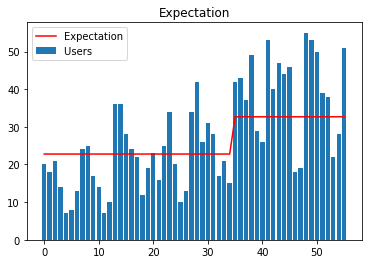

In [125]:
plt.plot(E, color="r", label="Expectation")
plt.bar(range(len(x)),x, label="Users ")
plt.legend()
plt.title("Expectation")
#plt.savefig("uservsE.png")

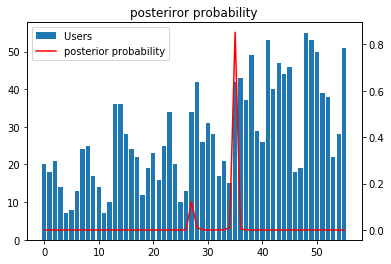

In [126]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(range(len(x)),x, label="Users ")
ax2.plot(pi, c="r", label = "posterior probability")

handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()

ax1.legend(handler1 + handler2, label1 + label2)
plt.title("posteriror probability")
#plt.savefig("probvsuser.png")